# Unsupervised learning for detecting abonormal companies
Main methods:
dimensionality reduction: PCA,KPCA,TSNE,UMAP

outlier detection :


Isolate forest :proximity based method 

Local outlier factor: proximity based method

Hierarchical clustering: distance_based

In [1]:
from sklearn.decomposition import PCA, KernelPCA,FactorAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
dat1=pd.read_csv("2020_processed.csv")
df_outliers = pd.DataFrame(columns=['method','outliers'])

In [3]:
dat1.iloc[1,1:3]
dat2=dat1.iloc[:,4:]
print(dat2.shape)
print("filtered variables", dat2.columns)
dat2.head()

(143, 41)
filtered variables Index(['Current assets', 'fixed asset', 'fixed assets - Breeding animals',
       'Fixed assets- Buildings', 'fixed assets -Land',
       'fixed assets -Equipment', 'fixed assets -Plantations',
       'age of the manager', 'insurance', 'self-financing',
       'working capital requirment', 'permanent capital', 'financial expenses',
       'CT debts -third party accounts', 'CT debts - financial accounts ',
       'LMT Debts- Constructions', 'LMTDebits -Land', 'Current liabilities',
       'Long- or medium-term debt (LMT)', 'Turnover debt (%)',
       'Gross operating surplus ', 'net working capital', 'taxes and duties',
       'financial independence', 'total net investment', 'total workforce',
       'liabilities', 'production of the financial year', 'gross product',
       'RACI per UTA', 'Repayment of loans to LMT ',
       'Current results before taxes ', 'Result of the ex. / turnover (%)',
       'Result of the financial year ', 'Stocks and work-in-prog

,Current assets,fixed asset,fixed assets - Breeding animals,Fixed assets- Buildings,fixed assets -Land,fixed assets -Equipment,fixed assets -Plantations,age of the manager,insurance,self-financing,...,Current results before taxes,Result of the ex. / turnover (%),Result of the financial year,Stocks and work-in-progress,Investment grants,Surface Agricultural Useful (OR),Debt ratio (%),Available values,Recoverable values,Sales and benefits in kind
0,136.35,183.56,1.95,47.77,25.18,63.54,34.82,46,9.41,37.59,...,43.04,28.91,47.72,47.68,8.70,34.28,41.34,51.84,36.83,163.20
1,335.91,417.12,1.12,140.66,38.46,106.77,116.67,47,23.25,74.71,...,114.46,26.81,129.75,109.95,32.13,54.21,43.68,132.19,93.77,473.52
2,136.58,171.84,1.57,56.19,28.69,47.16,30.52,49,7.62,25.42,...,41.69,29.23,50.00,37.16,10.72,24.17,32.73,69.05,30.37,168.90
3,220.00,272.38,7.68,35.18,104.96,101.62,0.80,55,12.65,43.99,...,29.40,24.09,43.66,76.83,0.85,157.24,27.75,97.29,45.87,174.77
4,86.51,143.94,2.93,12.13,66.74,55.43,0.16,54,5.53,26.39,...,15.18,31.04,24.66,20.15,0.12,68.90,31.21,46.66,19.70,73.36


In [4]:
#normalization and standardization
ss = StandardScaler()
dat_scale = ss.fit_transform(dat2)
dat_fi = pd.DataFrame(dat_scale,
                                 columns = dat2.columns)
dat_fi.head()

,Current assets,fixed asset,fixed assets - Breeding animals,Fixed assets- Buildings,fixed assets -Land,fixed assets -Equipment,fixed assets -Plantations,age of the manager,insurance,self-financing,...,Current results before taxes,Result of the ex. / turnover (%),Result of the financial year,Stocks and work-in-progress,Investment grants,Surface Agricultural Useful (OR),Debt ratio (%),Available values,Recoverable values,Sales and benefits in kind
0,-0.583193,-0.690710,-0.815162,-0.391550,-0.814462,-0.445295,0.702940,-2.601125,0.061631,0.034101,...,-0.024369,0.980929,-0.149567,-0.573655,-0.129809,-1.077217,-0.105319,-0.256629,-0.519033,-0.512511
1,1.056249,1.092955,-0.837747,1.562504,-0.168636,0.482755,3.356987,-2.133249,3.389721,1.846594,...,2.565984,0.652988,2.516503,0.303788,1.401075,-0.764572,0.129846,1.825657,0.931425,1.672861
2,-0.581304,-0.780214,-0.825502,-0.214425,-0.643766,-0.796937,0.563509,-1.197499,-0.368809,-0.560135,...,-0.073332,1.030901,-0.075464,-0.721891,0.002175,-1.235814,-0.970603,0.189371,-0.683591,-0.472369
3,0.104015,-0.012404,-0.659246,-0.656396,3.065360,0.372197,-0.400183,1.609753,0.840750,0.346600,...,-0.519082,0.228226,-0.281521,-0.162904,-0.642717,0.851677,-1.471081,0.921216,-0.288753,-0.431031
4,-0.992643,-0.993283,-0.788496,-1.141281,1.206663,-0.619398,-0.420936,1.141877,-0.871389,-0.512772,...,-1.034831,1.313554,-0.899043,-0.961578,-0.690415,-0.534127,-1.123359,-0.390870,-0.955393,-1.145192


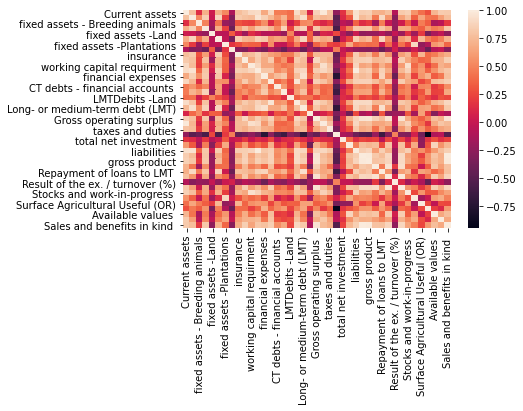

In [5]:
dataplot=sns.heatmap(dat_fi.corr())

First to try four dimensionality reduction techniques:
PCA, kernel PCA, UMAP and TSNE


explained variance ratio (first two components): [0.54755835 0.13814011 0.07939029 0.03963911 0.03336774 0.02726144
 0.01984169 0.01792784]


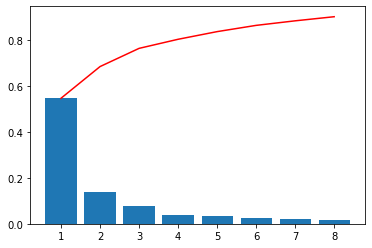

In [6]:
#####PCA
pca = PCA(n_components=0.9)
x_new = pca.fit(dat_fi).transform(dat_fi)

pca = PCA(n_components=0.9)
dat_pca_new = pca.fit(dat_fi).transform(dat_fi)

print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_ratio_
    )
plt.plot(
    range(1,len(pca.explained_variance_ )+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')

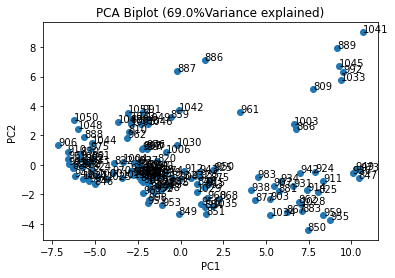

In [7]:
ID=dat1.iloc[:,0].values.tolist()
plt.scatter(x_new[:,0], x_new[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
explained=round((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]),2)
plt.title("PCA Biplot ({}%Variance explained)".format(explained*100))
for i, txt in enumerate(ID):
    plt.annotate(txt, (x_new[:,0][i], x_new[:,1][i]))
plt.show()

We use three outliers detection techniques to help us to decide if the data points are outliers automatically, using the rebuild variables. 

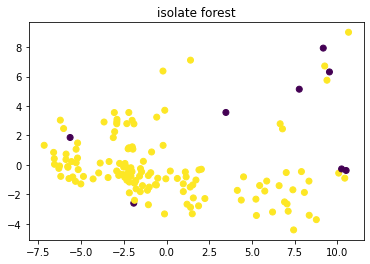

isolate forest [809, 888, 889, 949, 951, 961, 973, 992]


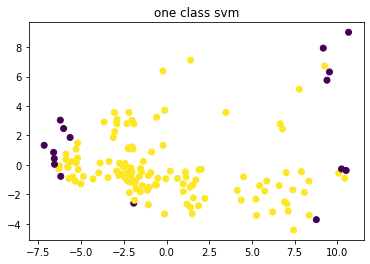

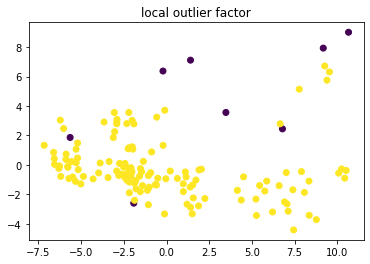

LOF [866, 886, 887, 888, 889, 951, 961, 1041]


In [8]:

####isolate forest
###The parameter: contamination  is to determine how many outliers want to be dectected from samples.
contamin=0.05


pca = PCA(n_components=0.9) #90% explained variance
x_new = pca.fit(dat_fi).transform(dat_fi)


rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng,contamination=contamin)
clf.fit(x_new)
y_pred = clf.predict(x_new)

b1 = plt.scatter(x_new[:, 0], x_new[:, 1], c=y_pred)
plt.title("isolate forest")
plt.show()
print("isolate forest",[ID[i] for i in range(0,len(ID)) if y_pred[i]==-1])
newrow={'method':'isolate forest', 'outliers':[ID[i] for i in range(0,len(ID)) if y_pred[i]==-1]}
df_outliers=df_outliers.append(newrow,ignore_index=True)


clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.0001)
clf.fit(x_new)
y_pred= clf.predict(x_new)
b2 = plt.scatter(x_new[:, 0], x_new[:, 1], c=y_pred)
plt.title("one class svm")
plt.show()

newrow={'method':'oneClassSVM', 'outliers':[ID[i] for i in range(0,len(ID)) if y_pred[i]==-1]}
df_outliers=df_outliers.append(newrow,ignore_index=True)


#Local Outlier Factor
clf = LocalOutlierFactor(n_neighbors=20, contamination=contamin)
y_pred = clf.fit_predict(x_new)
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_pred)
plt.title("local outlier factor")

plt.show()

print("LOF",[ID[i] for i in range(0,len(ID)) if y_pred[i]==-1])

newrow={'method':'local outlier factor', 'outliers':[ID[i] for i in range(0,len(ID)) if y_pred[i]==-1]}
df_outliers=df_outliers.append(newrow,ignore_index=True)

In [9]:
eigenvalues=pca.components_

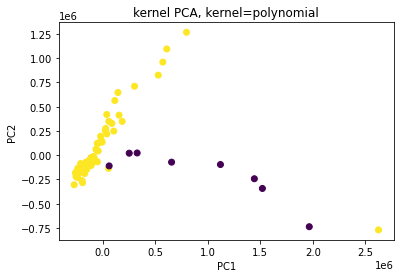

[809, 866, 889, 951, 961, 992, 1003, 1033, 1045]

In [10]:
##kernel PCA, polynomial

kernel_pca = KernelPCA(
    n_components=None, kernel="poly", gamma=100, fit_inverse_transform=True, alpha=0.3
)
x_kernel_new = kernel_pca.fit(dat_fi).transform(dat_fi)

#Local Outlier Factor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.06)
y_pred = clf.fit_predict(x_kernel_new)

plt.scatter(x_kernel_new[:,0], x_kernel_new[:,1],c=y_pred)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("kernel PCA, kernel=polynomial")

plt.show()



newrow={'method':'KPCA_poly', 'outliers':[ID[i] for i in range(0,len(ID)) if y_pred[i]==-1]}
df_outliers=df_outliers.append(newrow,ignore_index=True)


[ID[i] for i in range(0,len(ID)) if y_pred[i]==-1]

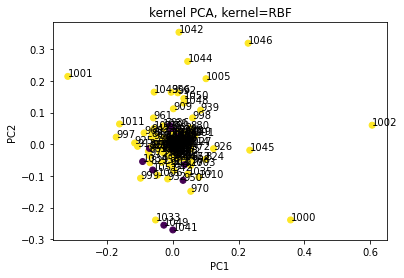

[808, 809, 862, 878, 903, 910, 927, 936, 950, 962, 973, 1034, 1041, 1049, 1051]

In [11]:
##kernel PCA, polynomial

kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=50, fit_inverse_transform=True, alpha=0.5
)
x_kernel_new = kernel_pca.fit(dat_fi).transform(dat_fi)


#Local Outlier Factor
clf = LocalOutlierFactor(n_neighbors=30, contamination=0.1)
y_pred = clf.fit_predict(x_kernel_new)
plt.scatter(x_kernel_new[:,0], x_kernel_new[:,1],c=y_pred)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("kernel PCA, kernel=RBF")
for i, txt in enumerate(ID):
    plt.annotate(txt, (x_kernel_new[:,0][i], x_kernel_new[:,1][i]))

plt.show()


[ID[i] for i in range(0,len(ID)) if y_pred[i]==-1]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 143 samples in 0.000s...
[t-SNE] Computed neighbors for 143 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 143 / 143
[t-SNE] Mean sigma: 2.440232
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.337654
[t-SNE] KL divergence after 400 iterations: 1.115403
[808, 809, 862, 878, 903, 910, 927, 936, 950, 962, 973, 1034, 1041, 1049, 1051]


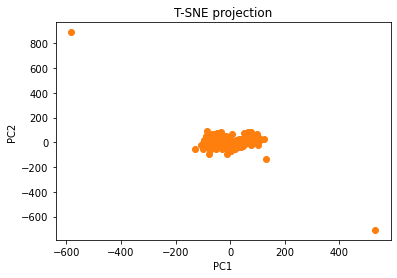

In [12]:
#####tsne method, the parameters are tunned mannully.
tsne = TSNE(n_components=2, verbose=1, random_state=123,n_iter=400,learning_rate=500)
z = tsne.fit_transform(dat_fi) 
df = pd.DataFrame()

df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2",
                palette=sns.color_palette("hls", 3),
                data=df).set(title=" T-SNE projection") 

plt.scatter(z[:,0], z[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("T-SNE projection")


print([ID[i] for i in range(0,len(ID)) if y_pred[i]==-1])



newrow={'method':'tsne', 'outliers':[ID[i] for i in range(0,len(ID)) if y_pred[i]==-1]}
df_outliers=df_outliers.append(newrow,ignore_index=True)

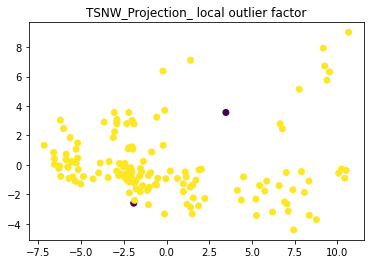

[951, 961]

In [13]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred = clf.fit_predict(x_new)
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_pred)
plt.title("TSNW_Projection_ local outlier factor")

plt.show()


[ID[i] for i in range(0,len(ID)) if y_pred[i]==-1]


Text(0.5, 1.0, 'UMAP projection')

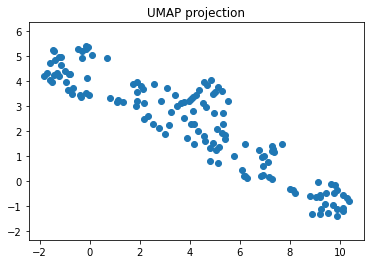

In [14]:
reducer = umap.UMAP(n_neighbors=10,
        min_dist=0.2)
embedding = reducer.fit_transform(dat_fi)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=12)


Hierarchical clustering methods strongly reply on the elucidate distance, which is not a good distance in high dimensions. So the diemnsionality reduced data with 90% explained variance is used for the next 

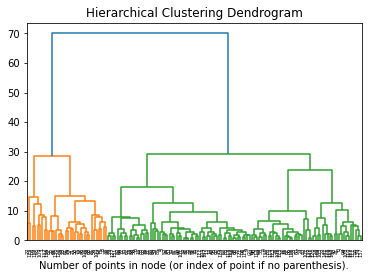

In [15]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(dat_pca_new)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
    

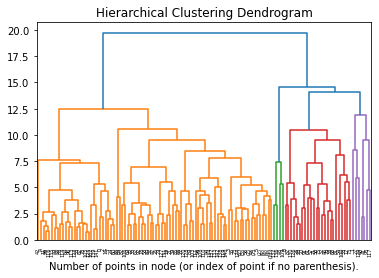

In [16]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='complete')
model = model.fit(dat_pca_new)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
    

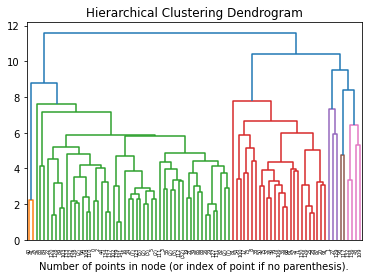

In [17]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
model = model.fit(dat_pca_new)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
    

In [18]:
###outliers


newrow={'method':'hierarchical_average', 'outliers':[ID[i] for i in [116,43,136,132,129,27]]}
df_outliers=df_outliers.append(newrow,ignore_index=True)

[ID[i] for i in [116,43,136,132,129,27]]

[1002, 889, 1045, 1041, 1033, 866]

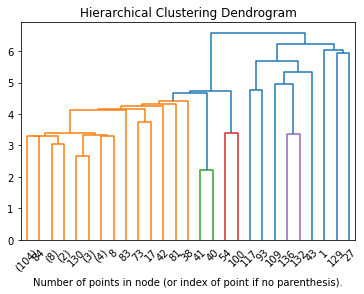

In [19]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')
model = model.fit(dat_pca_new)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
    

In [20]:

newrow={'method':'hierarchical_single', 'outliers':[ID[i] for i in [43,136,132]]}
df_outliers=df_outliers.append(newrow,ignore_index=True)

[ID[i] for i in [43,136,132]]

[889, 1045, 1041]

Summary for hierarchical clustering method: 
Wald, Single method, no outliers can be detected.
But from single and average, we can obtain some clusters which are far away from majority of points,classified as outliers here.

In [21]:
df_outliers

,method,outliers
0,isolate forest,"[809, 888, 889, 949, 951, 961, 973, 992]"
1,oneClassSVM,"[888, 889, 906, 910, 941, 949, 951, 955, 969, ..."
2,local outlier factor,"[866, 886, 887, 888, 889, 951, 961, 1041]"
3,KPCA_poly,"[809, 866, 889, 951, 961, 992, 1003, 1033, 1045]"
4,tsne,"[808, 809, 862, 878, 903, 910, 927, 936, 950, ..."
5,hierarchical_average,"[1002, 889, 1045, 1041, 1033, 866]"
6,hierarchical_single,"[889, 1045, 1041]"


In [22]:
df.to_csv("outliers_company", sep='\t')

In [32]:
a=[]
for i in df_outliers['outliers']:
    a=a+i
frequency = {}

for item in a:
   if item in frequency:
      frequency[item] += 1
   else:
      frequency[item] = 1
print("all_outliers","length",len(frequency),frequency)

d = dict((k, v) for k, v in frequency.items() if v >= 3)
print("\n strict outliers","length",len(d),d)

all_outliers length 35 {809: 3, 888: 3, 889: 6, 949: 2, 951: 4, 961: 3, 973: 3, 992: 3, 906: 1, 910: 2, 941: 1, 955: 1, 969: 1, 999: 1, 1033: 3, 1041: 5, 1048: 1, 1050: 1, 866: 3, 886: 1, 887: 1, 1003: 1, 1045: 3, 808: 1, 862: 1, 878: 1, 903: 1, 927: 1, 936: 1, 950: 1, 962: 1, 1034: 1, 1049: 1, 1051: 1, 1002: 1}

 strict outliers length 11 {809: 3, 888: 3, 889: 6, 951: 4, 961: 3, 973: 3, 992: 3, 1033: 3, 1041: 5, 866: 3, 1045: 3}
